In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from paperfig import *

light_speed = 299792.458  # speed of light in km/s

set_fontscale(2.0)

## X-shooter detected line list

In [3]:
import pandas as pd

xshooter_df = pd.read_csv(
    "./data/x-shooter/smp-lmc-58-xshooter.tsv", sep="\t", header=0, comment="#"
)

# Convert all columns to numeric, coercing errors to NaN
xshooter_df.iloc[:, 1:] = xshooter_df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# drop first two rows, reset ids
xshooter_df = xshooter_df.drop([0, 1])
xshooter_df = xshooter_df.reset_index(drop=True)

xshooter_df

,Line,WaveLab,WaveObs,e_WaveObs,Flux,e_Flux,Width,e_Width,Flag
0,H23,3674.81,3678.171263,0.161667,0.0,0.0,0.315782,0.172655,0.0
1,H22,3677.42,3680.758229,0.089416,0.0,0.0,0.186182,0.093222,0.0
2,H21,3680.41,3683.693241,0.03375,0.0,0.0,0.308325,0.03591,0.0
3,H20,3683.86,3687.1826,0.02958,0.0,0.0,0.34766,0.031796,0.0
4,H19,3687.89,3691.201354,0.079452,0.0,0.0,0.294115,0.080168,0.0
...,...,...,...,...,...,...,...,...,...
117,HeI,21125.84,21145.151405,0.065258,0.0,0.0,1.334832,0.066863,0.0
118,H2_10S1,21218.3,21237.848803,0.113864,0.0,0.0,1.613606,0.160866,0.0
119,HeI,21647.4,21667.66071,0.065453,0.0,0.0,1.732298,0.189995,0.0
120,Br{gamma},21661.21,21681.073459,0.013909,0.0,0.0,1.561267,0.013886,0.0


## Arc line FWHM

In [ ]:
arc_lines_df = pd.read_csv(
    "./data/x-shooter/arc_lines.txt",
    delimiter=",",
    header=0,
    comment="#",
)

arc_lines_df

,N,SpatOrderID,minWave,Wave_cen,maxWave,dWave,Nlin,IDs_Wave_range,IDs_Wave_cov_percent,measured_fwhm,RMS
0,0,30,5177.3,5413.3,5613.7,0.109,28,5418.993 - 5613.546,44.6,3.7,0.374
1,1,29,5357.6,5599.6,5806.2,0.112,49,5494.254 - 5805.750,69.4,3.4,0.330
2,2,28,5549.8,5799.2,6012.3,0.115,61,5560.017 - 6011.847,97.7,3.2,0.361
3,3,27,5755.9,6013.5,6233.7,0.119,63,5762.149 - 6228.001,97.5,3.1,0.387
4,4,26,5978.0,6244.2,6472.2,0.123,76,5990.728 - 6468.489,96.7,3.0,0.441
5,5,25,6217.5,6493.2,6729.7,0.128,61,6221.867 - 6729.361,99.1,3.0,0.336
6,6,24,6476.8,6763.0,7008.6,0.133,55,6492.528 - 7002.736,95.9,2.9,0.238
7,7,23,6758.5,7056.1,7311.9,0.138,50,6768.438 - 7298.287,95.8,2.9,0.218
8,8,22,7065.8,7375.9,7642.6,0.144,42,7069.142 - 7629.254,97.1,2.9,0.259
9,9,21,7402.3,7726.2,8005.0,0.151,51,7404.278 - 7995.886,98.2,2.9,0.363


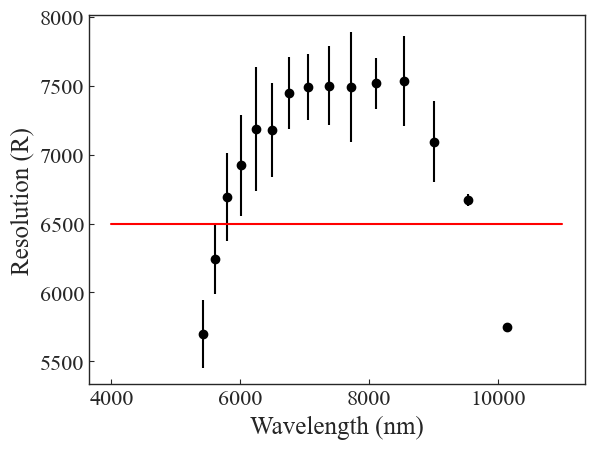

Text(0, 0.5, 'Velocity dispersion (km/s)')

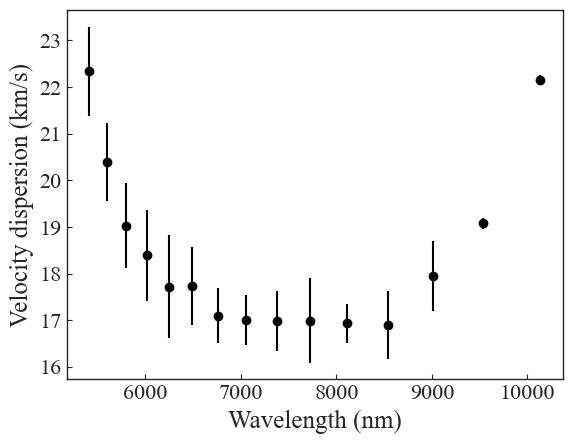

In [5]:
arcline_wavelengths = arc_lines_df["Wave_cen"].values

arcline_fwhms = arc_lines_df["measured_fwhm"] * arc_lines_df["dWave"] * 2.355
arcline_fwhm_uncertainty = arc_lines_df["RMS"] * arc_lines_df["dWave"]

arcline_resolution = arcline_wavelengths / arcline_fwhms
arcline_resolution_uncertainty = (
    arcline_fwhm_uncertainty / arcline_fwhms * arcline_resolution
)

arcline_sigma = light_speed / arcline_resolution / 2.355
arcline_sigma_uncertainty = arcline_fwhm_uncertainty / arcline_fwhms * arcline_sigma


plt.errorbar(
    arcline_wavelengths,
    arcline_resolution,
    yerr=arcline_resolution_uncertainty,
    fmt="o",
    color="black",
    label="Measured FWHM",
)
ls = np.linspace(4000, 11000, 1000)
plt.plot(
    ls,
    6500 * np.ones_like(ls),
    color="red",
    label="Expected FWHM",
)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Resolution (R)")
plt.show()

plt.errorbar(
    arcline_wavelengths,
    arcline_sigma,
    yerr=arcline_sigma_uncertainty,
    fmt="o",
    color="black",
    label="Measured FWHM",
)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Velocity dispersion (km/s)")

## Load X-shooter spectra

In [6]:
## load nod-mode reduction
file = "./large_data/x-shooter/pn/reflex_end_products/2025-06-20T12:33:24/XSHOO.2022-10-07T08:00:28.932_tpl/LMC-SMP-58_SCI_SLIT_FLUX_MERGE1D_VIS.fits"

data_1d, header_1d = fits.getdata(file, header=True, ext=0)
wavelengths_2d = header_1d["CRVAL1"] + header_1d["CDELT1"] * np.arange(
    header_1d["NAXIS1"]
)
noise_1d = fits.getdata(file, ext=1)

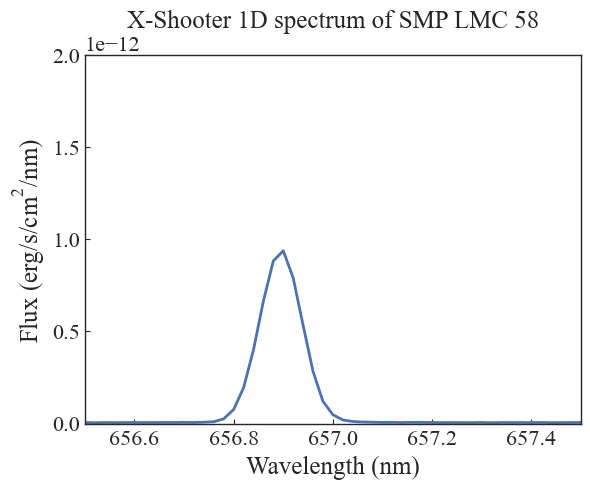

In [7]:
plt.plot(wavelengths_2d, data_1d, color="C0", linewidth=2)
plt.xlim(656.5, 657.5)
plt.ylim(-1e-14, 2e-12)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux (erg/s/cm$^2$/nm)")
plt.title("X-Shooter 1D spectrum of SMP LMC 58")
plt.show()

In [ ]:
pn_lines_xshooter_spectra = data_1d
pn_lines_xshooter_noise = noise_1d
pn_lines_xshooter_wavelengths = wavelengths_2d * 10

In [9]:
xshooter_df_clipped = xshooter_df[
    (xshooter_df["WaveObs"] > pn_lines_xshooter_wavelengths[0])
    & (xshooter_df["WaveObs"] < pn_lines_xshooter_wavelengths[-1])
]

xshooter_df_clipped

,Line,WaveLab,WaveObs,e_WaveObs,Flux,e_Flux,Width,e_Width,Flag
45,HeI,5877.24,5882.655117,0.00419,0.0,0.0,0.354695,0.004133,0.0
46,[OI],6302.05,6307.799915,0.019367,0.0,0.0,0.390905,0.019511,0.0
47,[SIII],6313.81,6319.527994,0.024861,0.0,0.0,0.373867,0.02521,0.0
48,[NII],6549.86,6555.832651,0.012512,0.0,0.0,0.359817,0.012626,0.0
49,H{alpha},6564.63,6570.593794,0.000747,0.0,0.0,0.417727,0.000569,0.0
50,CII,6579.87,6585.80423,0.036331,0.0,0.0,0.410715,0.038563,0.0
51,[NII],6585.27,6591.241658,0.008624,0.0,0.0,0.385106,0.008591,0.0
52,HeI,6680.0,6686.09931,0.011382,0.0,0.0,0.388769,0.011484,0.0
53,[SII],6732.67,6738.842717,0.05969,0.0,0.0,0.403888,0.062743,0.0
54,HeI,7067.14,7073.616503,0.003013,0.0,0.0,0.418146,0.002927,0.0


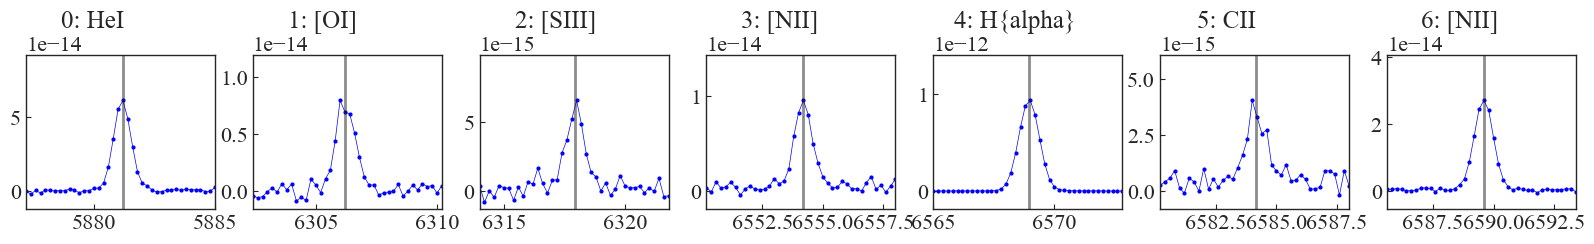

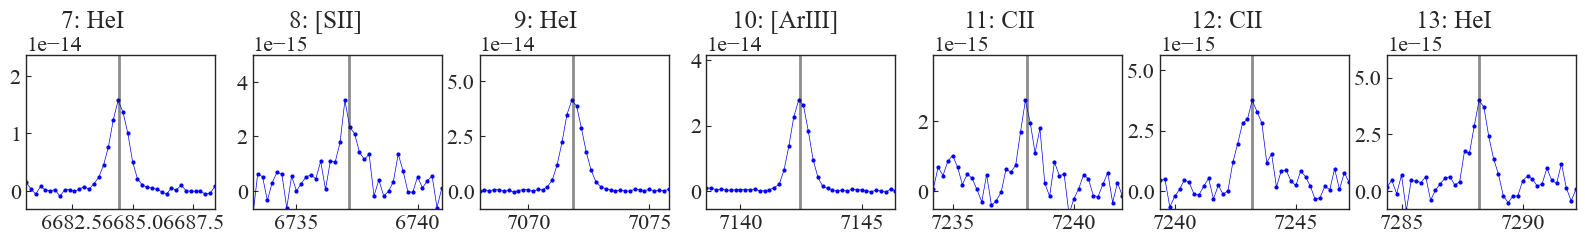

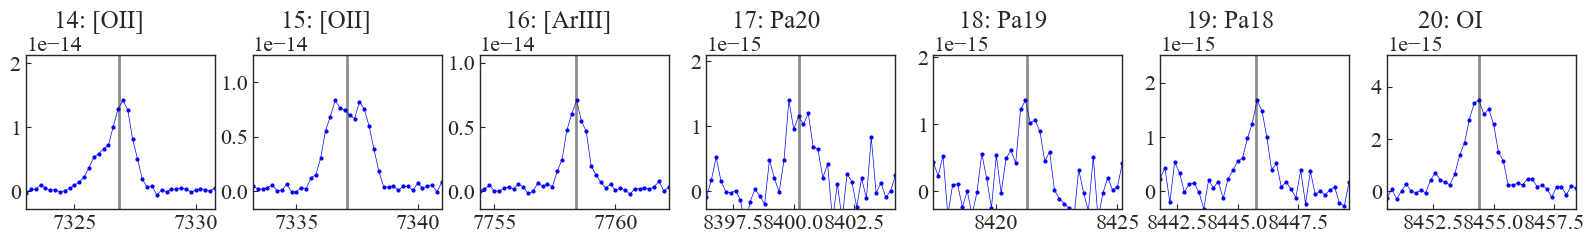

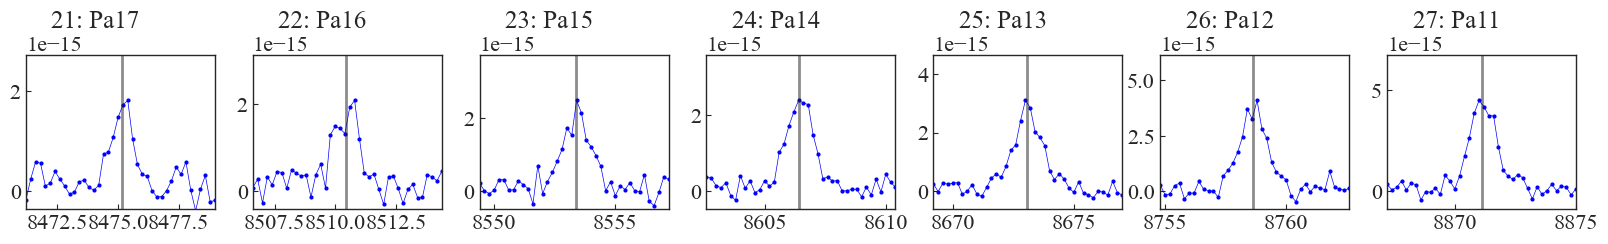

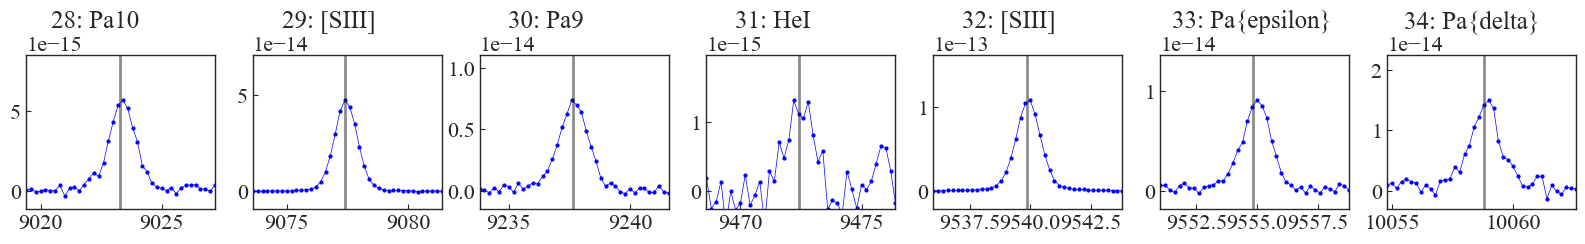

In [ ]:
%matplotlib inline

from util import get_spectra_cuts

col_size = 7

def plot_spectra_around_pn_line(index):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=col_size,
        figsize=(20, 2),
    )

    for i in range(col_size):
        ax = axes[i]

        vel = 75
        line_w = xshooter_df_clipped["WaveObs"].values[index + i] / (1 + vel / light_speed)
        
        w, s, n = get_spectra_cuts(
            line_w - 4,
            line_w + 4,
            pn_lines_xshooter_wavelengths,
            pn_lines_xshooter_spectra,
            pn_lines_xshooter_noise,
        )
        ax.plot(
            w,
            s,
            color="blue",
            alpha=1,
            label="sky line",
            lw=0.5,
            marker="o",
            markersize=2,
        )

        for j in range(-3, 3):
            if index + i + j < 0:
                continue
            if index + i + j >= len(xshooter_df_clipped):
                continue 
            ax.axvline(
                xshooter_df_clipped["WaveObs"].values[index + i + j] / (1 + vel / light_speed),
                color="k",
                alpha=0.5,
                linestyle="-",
                lw=2,
            )
            ax.set_title(f"{index + i}: {xshooter_df_clipped["Line"].values[index + i]}")

        ax.set_ylim(-np.max(s)/5, np.max(s) * 1.5)
        ax.set_xlim(w[0], w[-1])

    return fig

for n in range(5):
    plot_spectra_around_pn_line(n * col_size)
    plt.show()

In [ ]:
selected_pn_line_indices = [4]

## Fit a model

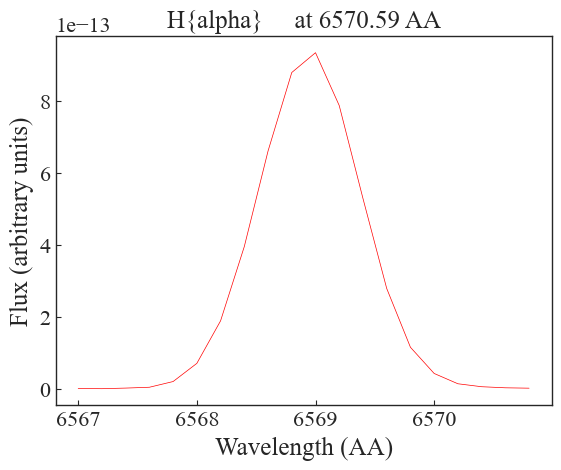

In [12]:
from specutils.utils.wcs_utils import vac_to_air
from astropy import units as u

pn_line_wavelength_cuts = []
pn_line_spectra_cuts = []
pn_line_noise_cuts = []
pn_line_line_lists = []

for n, i in enumerate(selected_pn_line_indices):
    original_wavelength = xshooter_df_clipped["WaveObs"].values[i]
    wavelength = original_wavelength / (1 + 75 / light_speed)
    start = wavelength - 2
    end = wavelength + 2

    wavelength_cut, spectra_cut, noise_cut = get_spectra_cuts(
        start,
        end,
        pn_lines_xshooter_wavelengths,
        pn_lines_xshooter_spectra,
        pn_lines_xshooter_noise,
        # smp_58_wavelengths, smp_58_spectra, smp_58_noise
    )

    pn_line_wavelength_cuts.append(wavelength_cut)
    pn_line_spectra_cuts.append(spectra_cut)
    pn_line_noise_cuts.append(noise_cut)

    air_wavelength = vac_to_air(xshooter_df_clipped["WaveLab"].values[i] * u.AA)
    pn_line_line_lists.append(np.array([air_wavelength.value]))

    plt.plot(
        wavelength_cut,
        spectra_cut,
        color="red",
        alpha=1,
        label="PN line",
        lw=0.5,
    )
    plt.xlabel("Wavelength (AA)")
    plt.ylabel("Flux (arbitrary units)")
    plt.title(
        f"{xshooter_df_clipped["Line"].values[i]} at {original_wavelength:.2f} AA"
    )
    plt.show()

In [13]:
lambda_pivot = np.sqrt(
    pn_lines_xshooter_wavelengths[0] * pn_lines_xshooter_wavelengths[-1]
)

lambda_pivot

np.float64(7377.894008455258)

In [ ]:
from scipy.stats import norm
from util import best_linear_fit_model
from nautilus import Prior


def get_resolution(wavelength, R_piv, alpha, beta=0.0, gamma=0.0):
    """
    Calculate the resolution based on the wavelength, R_0, and alpha.
    """
    x = (wavelength - lambda_pivot) / 10
    return R_piv + alpha * x + beta * x**2 + gamma * x**3


prior = Prior()
prior.add_parameter("pn_width", dist=(0, 20))
prior.add_parameter("R_piv", dist=(2000, 15000))
prior.add_parameter("alpha", dist=(0, 15))
prior.add_parameter("beta", dist=(-6, 0))

for i in range(len(pn_line_line_lists)):
    prior.add_parameter(f"velocity_pn_{i}", dist=(250, 350))


def likelihood(param_dict):
    # velocity = param_dict["velocity"]
    pn_width = param_dict["pn_width"]
    R_piv = param_dict["R_piv"]
    alpha = param_dict["alpha"]
    beta = param_dict["beta"]

    log_likelihood = 0

    delta = get_resolution(arcline_wavelengths, R_piv, alpha, beta) - arcline_resolution
    log_likelihood += -0.5 * np.nansum((delta / arcline_resolution_uncertainty) ** 2)

    for i, line_list in enumerate(pn_line_line_lists):
        resolution = get_resolution(line_list, R_piv, alpha, beta)
        fwhm = np.sqrt(
            (line_list / resolution) ** 2
            + (pn_width / light_speed * 2.355 * line_list) ** 2
        )
        velocity = param_dict[f"velocity_pn_{i}"]

        model = best_linear_fit_model(
            velocity,
            fwhm,
            pn_line_wavelength_cuts[i],
            pn_line_spectra_cuts[i],
            pn_line_noise_cuts[i],
            line_list,
        )

        log_likelihood += -0.5 * np.nansum(
            ((model - pn_line_spectra_cuts[i]) / pn_line_noise_cuts[i]) ** 2
        )

    return log_likelihood


def emcee_prior(params):
    pn_width, R_piv, alpha, beta, velocity_pn_0 = params

    if not 0 < pn_width < 20:
        return -np.inf
    if not 2000 < R_piv < 15000:
        return -np.inf
    if not 0 < alpha < 15:
        return -np.inf
    if not -6 < beta < 0:
        return -np.inf
    if not 250 < velocity_pn_0 < 350:
        return -np.inf

    return 0.0


def emcee_likelihood(params):
    pn_width, R_piv, alpha, beta, velocity_pn_0 = params

    param_dict = {
        "pn_width": pn_width,
        "R_piv": R_piv,
        "alpha": alpha,
        "beta": beta,
        "velocity_pn_0": velocity_pn_0,
    }

    for i in range(len(pn_line_line_lists)):
        param_dict[f"velocity_pn_{i}"] = params[4 + i]

    return likelihood(param_dict)


def emcee_posterior(params):
    prior_log_prob = emcee_prior(params)
    if np.isfinite(prior_log_prob):
        return prior_log_prob + emcee_likelihood(params)
    else:
        return -np.inf

In [15]:
from nautilus import Sampler

sampler = Sampler(prior, likelihood, n_live=3000)
sampler.run(verbose=True, discard_exploration=True)

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 47     | 1        | 4        | 164500   | N/A    | 10075 | -75.62   


np.True_

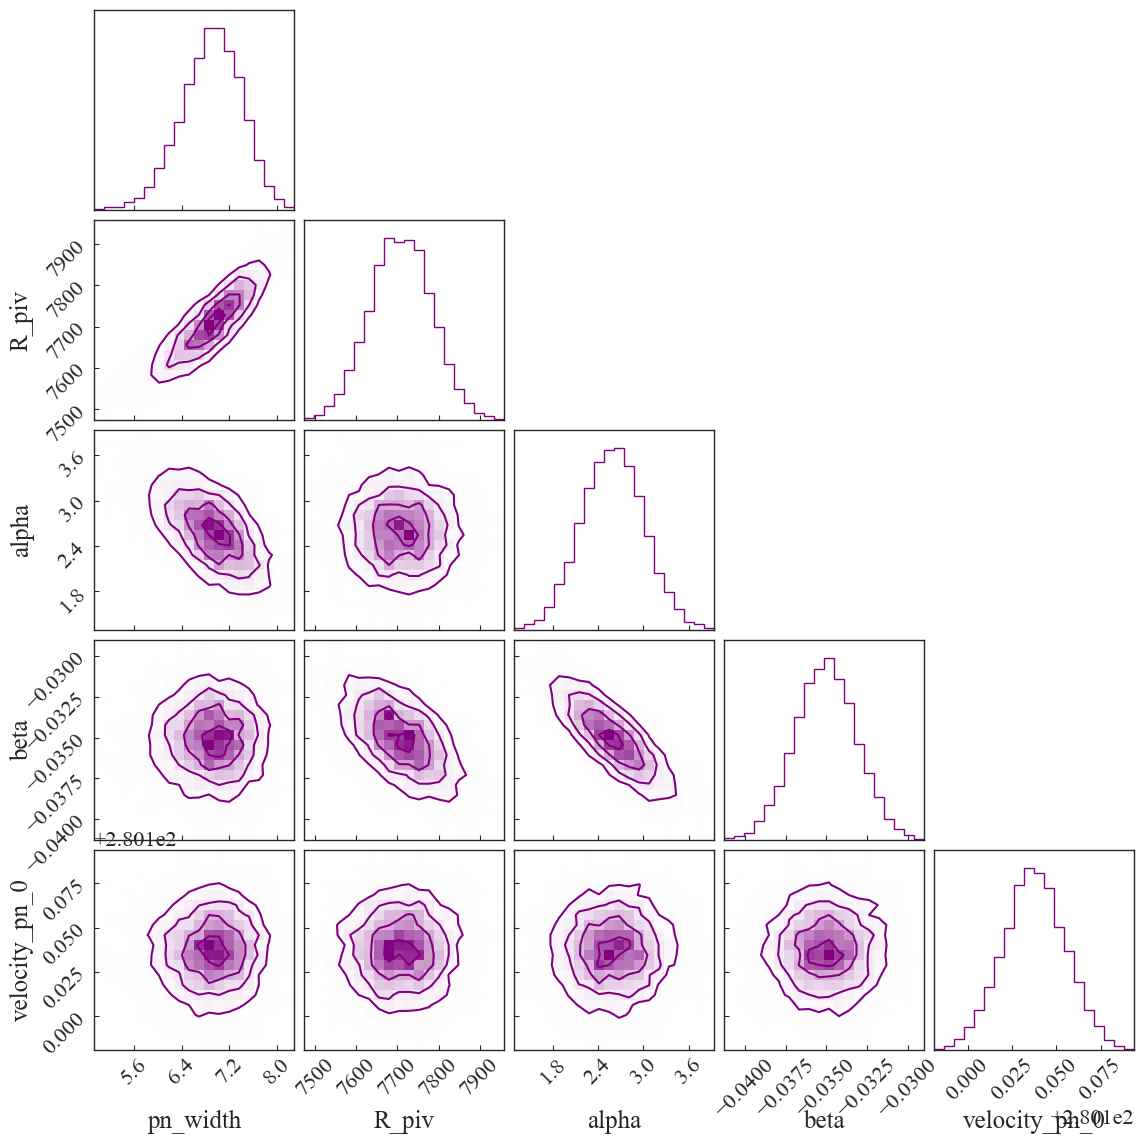

In [16]:
import corner

points, log_w, log_l = sampler.posterior()
corner.corner(
    points,
    weights=np.exp(log_w),
    bins=20,
    labels=prior.keys,
    color="purple",
    plot_datapoints=False,
    range=np.repeat(0.999, len(prior.keys)),
)
plt.show()

In [17]:
pn_values = np.percentile(
    points, [16, 50, 84], axis=0, weights=np.exp(log_w), method="inverted_cdf"
)

for i, key in enumerate(prior.keys):
    print(
        f"{key}: {pn_values[1][i]:.2f} + {pn_values[2][i] - pn_values[1][i]:.2f} - {pn_values[1][i] - pn_values[0][i]:.2f}"
    )

pn_width: 6.92 + 0.47 - 0.53
R_piv: 7709.48 + 73.55 - 75.51
alpha: 2.59 + 0.40 - 0.42
beta: -0.04 + 0.00 - 0.00
velocity_pn_0: 280.14 + 0.02 - 0.02


### Plot best fit resolution

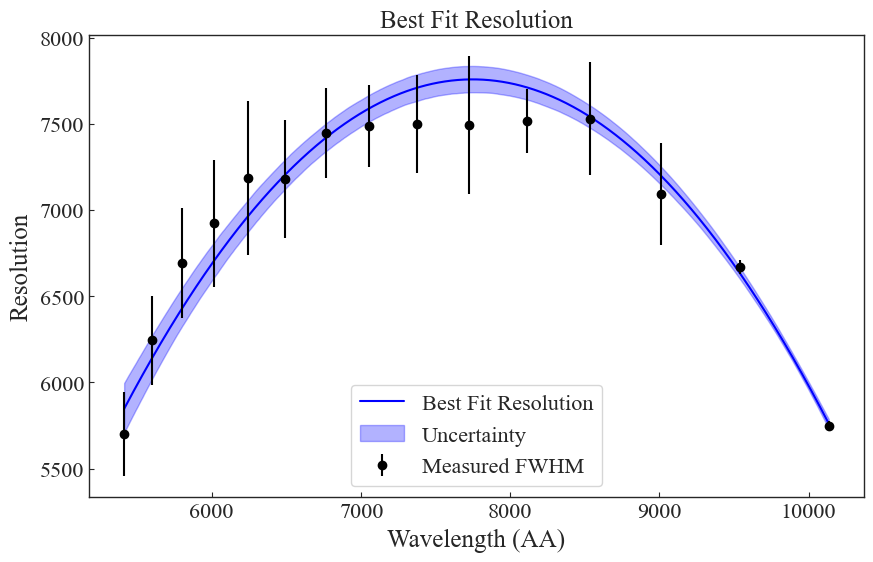

In [ ]:
best_fit_points = pn_values[1]

param_dict = dict(zip(prior.keys, best_fit_points))


R_piv = param_dict["R_piv"]
alpha = param_dict["alpha"]
beta = param_dict["beta"]

ls = np.linspace(arcline_wavelengths[0], arcline_wavelengths[-1], 1000)

plt.figure(figsize=(10, 6))
plt.plot(
    ls,
    get_resolution(ls, R_piv, alpha, beta),
    label="Best Fit Resolution",
    color="blue",
)
plt.errorbar(
    arcline_wavelengths,
    arcline_resolution,
    yerr=arcline_resolution_uncertainty,
    fmt="o",
    color="black",
    label="Measured FWHM",
)

# plot shaded region for uncertainty
N_sample = 1000
resolution_samples = np.zeros((N_sample, len(ls)))
for i in range(N_sample):
    sample = points[
        np.random.choice(len(points), p=np.exp(log_w) / np.sum(np.exp(log_w)))
    ]
    # sample = samples[np.random.randint(len(samples))]
    R_piv_sample = sample[prior.keys.index("R_piv")]
    alpha_sample = sample[prior.keys.index("alpha")]
    beta_sample = sample[prior.keys.index("beta")]

    resolution_samples[i, :] = get_resolution(
        ls, R_piv_sample, alpha_sample, beta_sample
    )

plt.fill_between(
    ls,
    np.percentile(resolution_samples, 16, axis=0),
    np.percentile(resolution_samples, 84, axis=0),
    color="blue",
    alpha=0.3,
    label="Uncertainty",
)

plt.xlabel("Wavelength (AA)")
plt.ylabel("Resolution")
plt.title("Best Fit Resolution")
plt.legend()
plt.show()

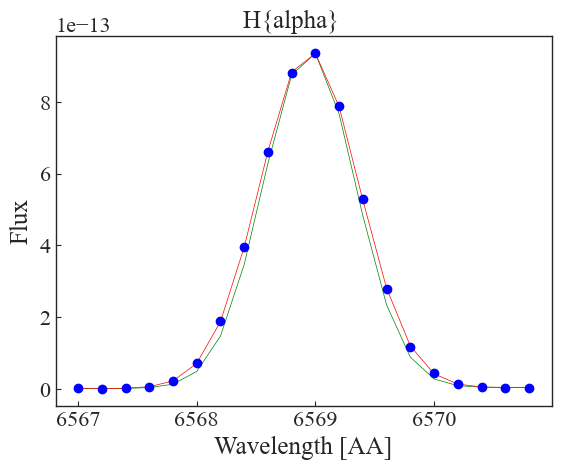

In [ ]:
best_fit_params = pn_values[1]

for i in range(len(pn_line_wavelength_cuts)):
    wavelength_cut = pn_line_wavelength_cuts[i]
    spectra_cut = pn_line_spectra_cuts[i]
    noise_cut = pn_line_noise_cuts[i]
    line_list = pn_line_line_lists[i]

    resolution = get_resolution(
        line_list, best_fit_params[1], best_fit_params[2], best_fit_params[3]
    )
    fwhm = np.sqrt(
        (line_list / resolution) ** 2
        + (best_fit_params[0] / light_speed * 2.355 * wavelength_cut) ** 2
    )

    model = best_linear_fit_model(
        best_fit_params[4 + i],
        fwhm,
        wavelength_cut,
        spectra_cut,
        noise_cut,
        line_list,
    )

    model_2 = best_linear_fit_model(
        best_fit_params[4 + i],
        line_list / resolution,
        wavelength_cut,
        spectra_cut,
        noise_cut,
        line_list,
    )
    min_model_2 = np.min(model_2)
    model_2 -= min_model_2
    model_2 = model_2 / np.max(model_2) * np.max(model - np.min(model))
    model_2 += np.min(model)

    plt.errorbar(
        wavelength_cut,
        model,
        yerr=np.abs(noise_cut),
        color="red",
        alpha=1,
        label="sky line",
        lw=0.5,
    )
    plt.plot(
        wavelength_cut,
        model_2,
        color="green",
        alpha=1,
        label="sky line (rescaled)",
        lw=0.5,
    )
    plt.errorbar(
        wavelength_cut,
        spectra_cut,
        yerr=np.abs(noise_cut),
        fmt="o",
        color="blue",
        alpha=1,
        label="sky line",
        lw=0.5,
    )
    plt.xlabel("Wavelength [AA]")
    plt.ylabel("Flux")
    plt.title(xshooter_df_clipped["Line"].values[selected_pn_line_indices[i]])

    plt.show()

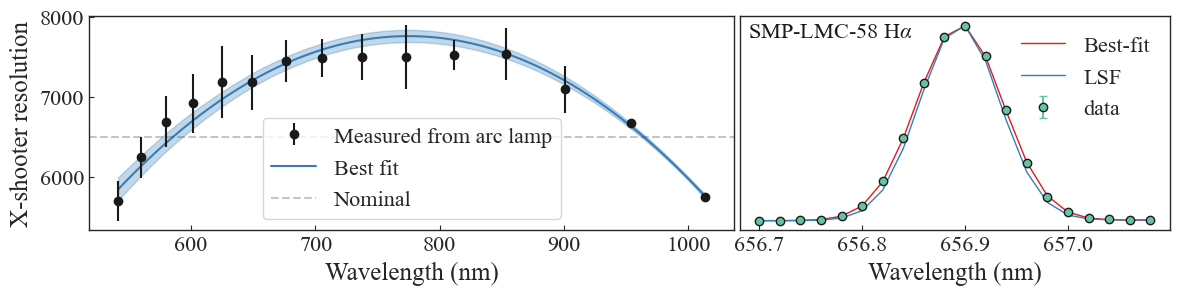

In [ ]:
import paperfig as pf
import matplotlib.gridspec as gridspec

pf.set_fontscale(2)

# two subplots, one covering 80% width, one covering 20% width

fig = plt.figure(
    figsize=pf.get_fig_size(width=pf.mnras_textwidth * 2, height_ratio=0.2),
)

gs = gridspec.GridSpec(
    1, 2, width_ratios=[60, 40], wspace=0.01  # left:80, right:20
)  # optional: reduce gap

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.plot(
    ls / 10,
    get_resolution(ls, R_piv, alpha, beta),
    label="Best fit",
    color=pf.cb_blue,
)

ax1.fill_between(
    ls / 10,
    np.percentile(resolution_samples, 16, axis=0),
    np.percentile(resolution_samples, 84, axis=0),
    color=pf.cb_blue,
    alpha=0.3,
)
ax1.axhline(6500, color=pf.cb_grey, alpha=0.3, linestyle="--", label="Nominal")
ax1.errorbar(
    arcline_wavelengths / 10,
    arcline_resolution,
    yerr=arcline_resolution_uncertainty,
    fmt="o",
    color="k",
    label="Measured from arc lamp",
)


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    [handles[i] for i in [2, 0, 1]],
    [labels[i] for i in [2, 0, 1]],
    loc="lower center",
    frameon=True,
)

ax1.set_xlabel(r"Wavelength (nm)")
ax1.set_ylabel("X-shooter resolution")


ax2.plot(
    wavelength_cut / 10,
    model,
    color=pf.cb_red,
    alpha=1,
    label="Best-fit",
    lw=1,
)
ax2.plot(
    wavelength_cut / 10,
    model_2,
    color=pf.cb_blue,
    alpha=1,
    label="LSF",
    lw=1,
)
ax2.errorbar(
    wavelength_cut / 10,
    spectra_cut,
    yerr=np.abs(noise_cut),
    fmt="o",
    color=pf.cb2_emerald,
    alpha=1,
    label="data",
    lw=1.5,
    capsize=3,
    markeredgecolor="k",
)

ax2.set_xlabel("Wavelength (nm)")
ax2.set_yticks([])
ax2.legend(loc="upper right", frameon=False)
ax2.text(
    0.02, 0.9, r"SMP-LMC-58 H$\alpha$", transform=ax2.transAxes, fontsize=16, color="k"
)

fig.subplots_adjust(hspace=0.01)

fig.savefig(
    "/Users/ajshajib/Dropbox/papers_proposals/jwst_lsf/f2.pdf", bbox_inches="tight"
)